In [1]:
%autosave 15
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import stats as sps
import scipy.optimize as spo

import math
from collections import namedtuple
from functools import partial

Autosaving every 15 seconds


In [2]:
data = pd.read_csv('non-parametric.csv', sep=';', names=['id', 'x', 'y'])

#1st parameter is text
ids = data['id'].values[1:].astype('int')
X = data['x'].values[1:].astype('float32')
Y = data['y'].values[1:].astype('float32')
n = len(data) - 1
print('dataset size:', n)

dataset size: 136


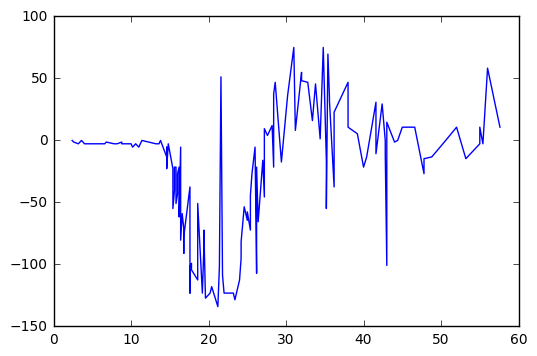

In [3]:
plt.plot(X, Y)

In [36]:
class SmoothingMethodRegression():
    
    def __init__(self, kernel, k):
        self.kernel = kernel
        self.k = k
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        
    def predict(self, x):
        sum1 = 0
        sum2 = 0
        dist = [(np.abs(self.x[i] - x), i) for i in range(len(self.x))]
        dist.sort()
        h = dist[self.k][0]
        if h == 0:
            print(dist)
        for i in range(self.k):
            elem = dist[i]
            value = self.kernel(elem[0] / h)
            sum1 += self.y[elem[1]] * value
            sum2 += value
        result = sum1 / sum2
        return result

In [38]:
def gaussKernel(x):
    return np.exp(- (x ** 2) / 2)

def quadKernel(x):
    return (1 - x ** 2) ** 2

kernels = [(gaussKernel, "gauss"), (quadKernel, "quad")]

In [21]:
def computeScore(model, x, y):
    acc = 0
    for i in range(len(x)):
        acc += (model.predict(x[i]) - y[i]) ** 2
    return acc / len(x)

In [45]:
best_MSE = 3000000000 # mnoga
best = None
for kernel, name in kernels:
    for k in range(7, 30):
        model = SmoothingMethodRegression(kernel, k)
        model.fit(X, Y)
        MSE = computeScore(model, X, Y)
        if MSE < best_MSE:
            best_MSE = MSE
            best = (kernel, k)
        print(name, k, "score", MSE)

gauss 7 score 701.838801077
gauss 8 score 692.473722365
gauss 9 score 720.119836196
gauss 10 score 743.740484902
gauss 11 score 753.933705938
gauss 12 score 756.949677355
gauss 13 score 774.772119576
gauss 14 score 778.060419265
gauss 15 score 775.484898793
gauss 16 score 791.04234343
gauss 17 score 802.680759729
gauss 18 score 809.352592473
gauss 19 score 816.536241762
gauss 20 score 812.347029498
gauss 21 score 809.06825278
gauss 22 score 826.005905182
gauss 23 score 827.873192745
gauss 24 score 840.907259238
gauss 25 score 853.874750757
gauss 26 score 868.945957746
gauss 27 score 882.714415809
gauss 28 score 897.775488234
gauss 29 score 922.304688814
quad 7 score 627.579324727
quad 8 score 635.049054212
quad 9 score 652.569343536
quad 10 score 661.597588186
quad 11 score 677.164199308
quad 12 score 687.299784256
quad 13 score 695.738043834
quad 14 score 700.873048867
quad 15 score 708.9922173
quad 16 score 721.263918659
quad 17 score 724.22571789
quad 18 score 726.840587888
quad 19 

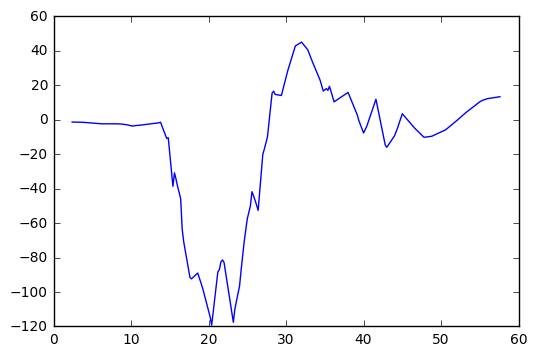

In [46]:
best_smooth = SmoothingMethodRegression(best[0], best[1])
best_smooth.fit(X, Y)
Y_new = [best_smooth.predict(x) for x in X]
plt.plot(X, Y_new)